In [1]:
import pandas as pd
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
rdata_read = pyreadr.read_r("C:/Users/edfra/OneDrive/Documentos/GitHub/ECO224/Labs/data/wage2015_subsample_inference.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape

(5150, 20)

In [3]:
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


In [4]:
data_scl = data[data[ 'scl' ] == 1]
data_scl

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18
89,13.461538,2.599837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18
119,8.653846,2.158004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3
135,10.683761,2.368725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19
144,11.538462,2.445686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32528,12.019231,2.486508,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.1600,0.064000,0.025600,9620,22,6170,10
32539,38.461538,3.649659,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.5,0.5625,0.421875,0.316406,220,1,770,4
32551,27.884615,3.328075,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.5,8.1225,23.149125,65.975006,8140,21,770,4


In [5]:
datascl = data_scl[["lwage", "scl","clg"]]

In [6]:
datascl

,lwage,scl,clg
rownames,,,
84,2.486508,1.0,0.0
89,2.599837,1.0,0.0
119,2.158004,1.0,0.0
135,2.368725,1.0,0.0
144,2.445686,1.0,0.0
...,...,...,...
32528,2.486508,1.0,0.0
32539,3.649659,1.0,0.0
32551,3.328075,1.0,0.0


In [7]:
data_clg = data[data[ 'clg' ] == 1]
data_clg

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
71,19.230769,2.956512,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,7.84,21.952,61.4656,40,1,9170,21
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,2.89,4.913,8.3521,2550,8,9480,22


In [8]:
dataclg = data_clg[["lwage", "scl", "clg"]]

In [9]:
dataclg

,lwage,scl,clg
rownames,,,
10,2.263364,0.0,1.0
12,3.872802,0.0,1.0
19,3.361977,0.0,1.0
30,2.462215,0.0,1.0
71,2.956512,0.0,1.0
...,...,...,...
32593,3.051822,0.0,1.0
32596,3.818735,0.0,1.0
32606,3.179655,0.0,1.0


In [10]:
frames = [datascl, dataclg]

In [11]:
df = pd.concat(frames)

In [12]:
df

,lwage,scl,clg
rownames,,,
84,2.486508,1.0,0.0
89,2.599837,1.0,0.0
119,2.158004,1.0,0.0
135,2.368725,1.0,0.0
144,2.445686,1.0,0.0
...,...,...,...
32593,3.051822,0.0,1.0
32596,3.818735,0.0,1.0
32606,3.179655,0.0,1.0


In [13]:
frames1 = [data_scl,data_clg]

In [14]:
df1 = pd.concat(frames1)

In [15]:
df1

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18
89,13.461538,2.599837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18
119,8.653846,2.158004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3
135,10.683761,2.368725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19
144,11.538462,2.445686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,7.8400,21.952000,61.465600,40,1,9170,21
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.2500,0.125000,0.062500,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,2.8900,4.913000,8.352100,2550,8,9480,22


In [16]:
df2 = df1[["wage","lwage","sex","shs","hsg","ad","mw","so","we","ne","exp1","exp2","exp3","exp4","occ","occ2","ind","ind2",]]
df2

,wage,lwage,sex,shs,hsg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18
89,13.461538,2.599837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18
119,8.653846,2.158004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3
135,10.683761,2.368725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19
144,11.538462,2.445686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,7.8400,21.952000,61.465600,40,1,9170,21
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.2500,0.125000,0.062500,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,2.8900,4.913000,8.352100,2550,8,9480,22


In [17]:
education = np.ones((3068,1))
education

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [18]:
df2['education'] = education

<ipython-input-18-f6a1b1a4d04a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['education'] = education


In [19]:
df2

,wage,lwage,sex,shs,hsg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,education
rownames,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18,1.0
89,13.461538,2.599837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18,1.0
119,8.653846,2.158004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3,1.0
135,10.683761,2.368725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19,1.0
144,11.538462,2.445686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,7.8400,21.952000,61.465600,40,1,9170,21,1.0
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.2500,0.125000,0.062500,3255,10,8190,18,1.0
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,2.8900,4.913000,8.352100,2550,8,9480,22,1.0


As you can see, education variable now represents the integration of both variables: scl =1 y clg = 1 . If education = 1, then it means that this person is a College-educated worker.

## Bivariate regression

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
nocontrol_model = smf.ols( formula = 'lwage ~ education', data = df2 )

nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['education']
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}' )

The estimated gender coefficient is 1.5000111495879922 and the corresponding robust standard error is 0.004914480976012768


## OlS regression with controls

In [22]:
flex = 'lwage ~ education + (exp1+exp2+exp3+exp4)*(shs+hsg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = df2 )
control_est = control_model.fit().summary2().tables[1]['Coef.']['education']

print(control_model.fit().summary2().tables[1])
print( f"Coefficient for OLS with controls {control_est}" )

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

               Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept   1.622022  0.162879  9.958442  5.485527e-23  1.302649  1.941395
occ2[T.10]  0.089930  0.248867  0.361357  7.178593e-01 -0.398049  0.577909
occ2[T.11] -0.573282  0.445848 -1.285824  1.986091e-01 -1.447499  0.300936
occ2[T.12]  0.279018  0.349295  0.798804  4.244709e-01 -0.405879  0.963915
occ2[T.13] -0.179892  0.278335 -0.646313  5.181286e-01 -0.725651  0.365868
...              ...       ...       ...           ...       ...       ...
exp4:shs    0.000000  0.000000       NaN           NaN  0.000000  0.000000
exp4:hsg    0.000000  0.000000       NaN           NaN  0.000000  0.000000
exp4:mw     0.019817  0.026373  0.751421  4.524614e-01 -0.031894  0.071528
exp4:so    -0.004482  0.023070 -0.194278  8.459724e-01 -0.049718  0.040754
exp4:we     0.024795  0.024359  1.017893  3.088154e-01 -0.022968  0.072558

[236 rows x 6 columns]
Coefficient for OLS with controls 1.6220223357427224


The estimated regression coefficient $\beta_1\approx 1.6220223357427224$ measures how our linear prediction of wage changes if we set the education variable $education$ in 1.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make

## Partialling-Out using ols

In [23]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'education ~ (exp1+exp2+exp3+exp4)*(shs+hsg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = df2).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = df2 ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

print("Coefficient for D via partialling-out", partial_est)

# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# confidence interval
partial_fit.conf_int( alpha=0.05 ).iloc[1, :]

Coefficient for D via partialling-out -1295881955.348343


0   -6.381054e+11
1    6.355136e+11
Name: t_D, dtype: float64

Again, the estimated coefficient measures the linear predictive effect (PE) of $education$ on $Wage$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

## The relationship between Log Wage and Years of Experience raised to fourth(x^4) in College-educated workers

Now, I am going to plot the Experience profiles: The relationship between Log Wage and Years of Experience raised to fourth(x^4) in College-educated workers. It is the years of experience raised to fourth due to it shows very well the log wage trajectory in life

In [24]:
flexible = 'lwage ~ exp1+exp2+exp3+exp4'

In [25]:
modelo_multi = smf.ols( formula = flexible, data = df2 ).fit()
modelo_multi.params

Intercept    3.052408
exp1        -0.051352
exp2         0.581122
exp3        -0.192818
exp4         0.019680
dtype: float64

In [26]:
df2["lwage_pred"] = 3.052408 - 0.051352*df2["exp1"]+ 0.581122*df2["exp2"] -0.192818*df2["exp3"]+ 0.019680*df2["exp4"]

In [27]:
df2["RSE"] = (df2["lwage"]-df2["lwage_pred"])**2

In [28]:
SSD = sum(df2["RSE"])

In [29]:
RSE = np.sqrt(SSD/len(df2)-2)

<ipython-input-29-1533da208c6b>:1: RuntimeWarning: invalid value encountered in sqrt
  RSE = np.sqrt(SSD/len(df2)-2)


In [30]:
#lwage_pred = modelo_multi.predict(pd.DataFrame(df2["exp4"]))

In [31]:
df2

,wage,lwage,sex,shs,hsg,ad,mw,so,we,ne,...,exp2,exp3,exp4,occ,occ2,ind,ind2,education,lwage_pred,RSE
rownames,,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.3025,0.166375,0.091506,3600,11,8270,18,1.0,2.915482,0.184019
89,13.461538,2.599837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.2025,8.615125,17.661006,3645,11,8190,18,1.0,3.128275,0.279247
119,8.653846,2.158004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.1225,0.042875,0.015006,7410,20,570,3,1.0,2.935892,0.605109
135,10.683761,2.368725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.4225,0.274625,0.178506,4300,15,8590,19,1.0,2.914704,0.298094
144,11.538462,2.445686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.7225,0.614125,0.522006,3600,11,8190,18,1.0,2.927635,0.232275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,7.8400,21.952000,61.465600,40,1,9170,21,1.0,3.147451,0.009145
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.2500,0.125000,0.062500,3255,10,8190,18,1.0,2.918056,0.811222
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.8900,4.913000,8.352100,2550,8,9480,22,1.0,3.075921,0.010761


Text(0, 0.5, 'Log Wage')

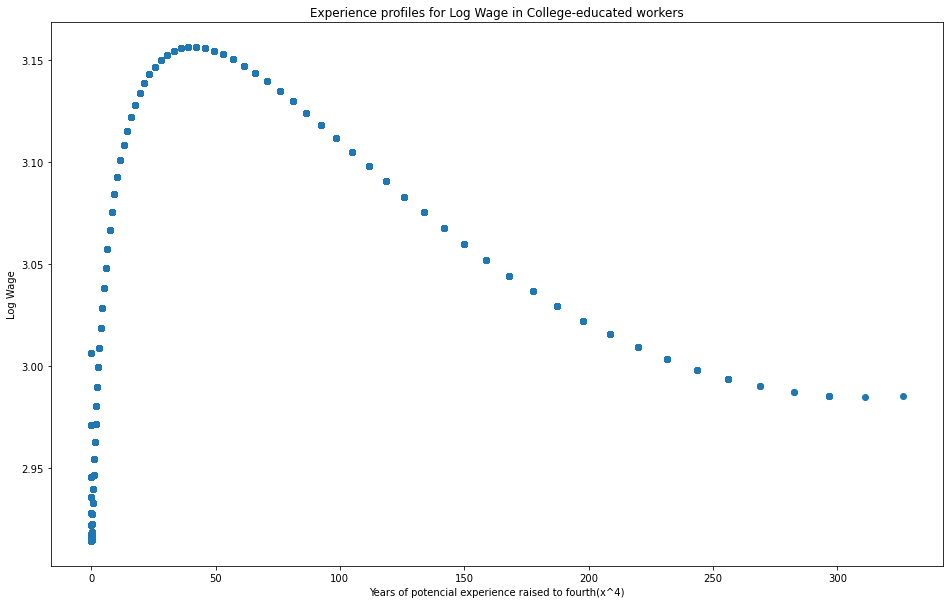

In [32]:
fig, ax = plt.subplots(figsize =(16,10))
plt.plot(df2['exp4'],df2["lwage_pred"],marker='o',linestyle='')
plt.title('Experience profiles for Log Wage in College-educated workers')
plt.xlabel('Years of potencial experience raised to fourth(x^4)')
plt.ylabel('Log Wage')

In [33]:
df2

,wage,lwage,sex,shs,hsg,ad,mw,so,we,ne,...,exp2,exp3,exp4,occ,occ2,ind,ind2,education,lwage_pred,RSE
rownames,,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.3025,0.166375,0.091506,3600,11,8270,18,1.0,2.915482,0.184019
89,13.461538,2.599837,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.2025,8.615125,17.661006,3645,11,8190,18,1.0,3.128275,0.279247
119,8.653846,2.158004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.1225,0.042875,0.015006,7410,20,570,3,1.0,2.935892,0.605109
135,10.683761,2.368725,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.4225,0.274625,0.178506,4300,15,8590,19,1.0,2.914704,0.298094
144,11.538462,2.445686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.7225,0.614125,0.522006,3600,11,8190,18,1.0,2.927635,0.232275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,7.8400,21.952000,61.465600,40,1,9170,21,1.0,3.147451,0.009145
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.2500,0.125000,0.062500,3255,10,8190,18,1.0,2.918056,0.811222
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.8900,4.913000,8.352100,2550,8,9480,22,1.0,3.075921,0.010761


In [34]:
xd=df2[["lwage","exp1","exp2","exp3","exp4"]]

In [35]:
xd1=xd.sort_values(by=["exp4"])
xd1

,lwage,exp1,exp2,exp3,exp4
rownames,,,,,
28120,2.956512,1.0,0.0100,0.001000,0.000100
18639,2.822980,1.0,0.0100,0.001000,0.000100
15321,2.179287,1.0,0.0100,0.001000,0.000100
15159,2.793993,1.0,0.0100,0.001000,0.000100
18683,2.419710,1.0,0.0100,0.001000,0.000100
...,...,...,...,...,...
16974,3.274965,41.5,17.2225,71.473375,296.614506
29969,2.486508,41.5,17.2225,71.473375,296.614506
4058,2.697000,41.5,17.2225,71.473375,296.614506


In [36]:
xd2=xd1[["exp4","lwage"]].groupby(["exp4"]).mean()
xd2

,lwage
exp4,
0.000100,3.031143
0.001600,3.019492
0.008100,2.970624
0.015006,2.729320
0.025600,2.958921
...,...
269.042006,2.889598
282.576100,3.011219
296.614506,3.097123


In [43]:
xd2.reset_index(level=0, inplace=True)
xd2

,index,exp4,lwage
0,0,0.000100,3.031143
1,1,0.001600,3.019492
2,2,0.008100,2.970624
3,3,0.015006,2.729320
4,4,0.025600,2.958921
...,...,...,...
77,77,269.042006,2.889598
78,78,282.576100,3.011219
79,79,296.614506,3.097123
80,80,311.169600,2.668829


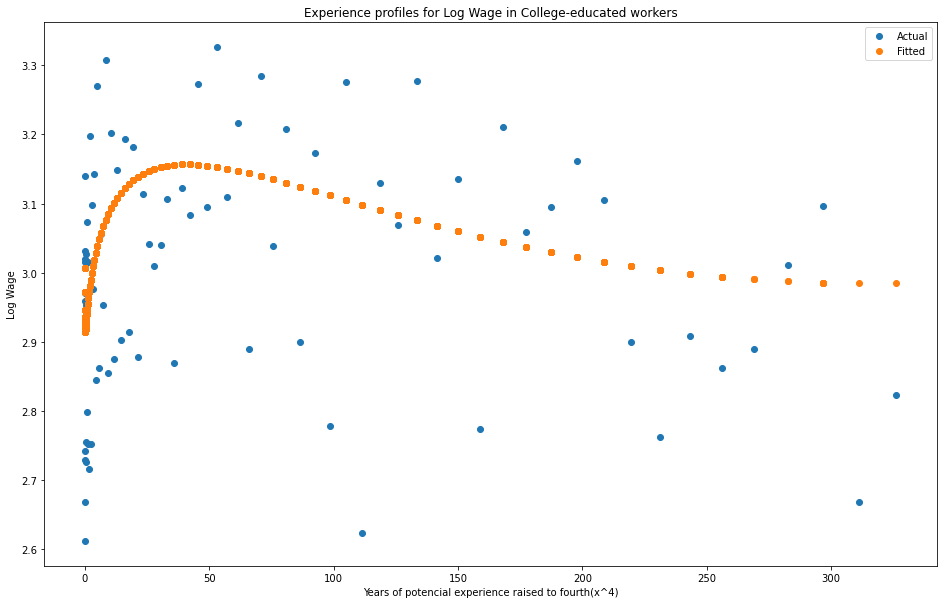

In [46]:
fig, ax = plt.subplots(figsize =(16,10))
plt.plot(xd2['exp4'], xd2['lwage'],marker='o',linestyle='')
plt.plot(df2['exp4'],df2["lwage_pred"],marker='o',linestyle='')
plt.title('Experience profiles for Log Wage in College-educated workers')
plt.xlabel('Years of potencial experience raised to fourth(x^4)')
plt.ylabel('Log Wage')
plt.legend(['Actual','Fitted'])

# Frisch - Waugh - Lowell Theorem 

* In econometrics, the Frisch-Waugh-Lovell (FWL) theorem is named after econometricians Ragnar Frisch, Frederick V. Waugh, and Michael C. Lovell offered another alternative to estimate econometric coefficients.

* To understand this theorem, take an ordinary least squares (OLS) econometric model of the vector y in relation to two sets of variables **X** and **Z** . The number of observations for each of the variables is **"n"**: 

$ Y= αX+ βZ+µ
$

* Or, by expanding in matrices:
$$
\begin{pmatrix}
y_{1}\\ 
y_{2}\\ 
y_{3}\\ 
y_{4}\\ 
y_{5}
\end{pmatrix} = 
\begin{pmatrix}
x_{11} & x_{12} & ... & x_{1k}\\ 
x_{21} & x_{22} & ... & x_{2k}\\ 
.                             \\
.                             \\
x_{n1} & x_{n2} & ... & x_{nk}
\end{pmatrix}\begin{pmatrix}
α_{1} \\ 
α_{2} \\ 
. \\ 
. \\ 
α_{5}
\end{pmatrix} + 
\begin{pmatrix}
z_{11} & z_{12} & ... & z_{1m}\\ 
z_{21} & z_{22} & ... & z_{2m}\\ 
.                             \\
.                             \\
z_{n1} & z_{n2} & ... & z_{nm}
\end{pmatrix}
\begin{pmatrix}
β_{1} \\ 
β_{2} \\ 
. \\ 
. \\ 
β_{m}
\end{pmatrix} + 
\begin{pmatrix}
µ_{1} \\ 
µ_{2} \\ 
. \\ 
. \\ 
µ_{m}
\end{pmatrix}
$$

* What the theorem states is that the sub-vector estimation β will be the same as that one obtained by the modified regression given by:

$$ M_{X} Y = M_{X}Z_{β} + M_{X}µ 
$$
* ,where:

$$ M_{X} = I - X*(X'X)^-1 X'
$$

* This result implies that all secondary regressions are unnecessary: ​​using projection matrices (such as $M_{x}$ to represent all variables orthogonal to each other will result in the same results as running the regression with all non-orthogonals included.

* Next, we are going to explain the proof of this theorem, Where the matriz X has been splitted in two sub groups:

* First of all, let's suppose we have this equation:

$$ Y= β_{1}X_{1}+ β_{2}X_{2}+µ
$$

* $\hat{\beta_{1}}$ and $\hat{\beta_{2}}$ are OLS estimators of this model. We will prove that, for example, $\hat{\beta_{1}}$ catchs the whole effect of $X_{1}$ over $Y$, but before that you must have eliminated any interference -if there were- of the vraibles in $X_{2}$.

* These are the following steps:

1. Estimate    $ y = X_{2} β_{2} + v $ through OLS and calculate the errors $e_{y} = M_{2}y $ where $ M_{2} = I- X_{2}(X_{2}'X_{2})^(-1)X_{2}'$.


2. Estimate $X_{1}= X_{2}β_{2} + w $ through OLS and calculate the residuals with $e_{x_{1}} = M_{2}X_{1}$.


3. Estimate $e_{y}= e_{x_{1}}β_{1} + z $ through OLS. This estimator is
 
    $\hat{\beta_{1}} = (e_{x_{1}}'e_{x_{1}})^(-1) e'_{x_{1}} e_{y}$.

* Replacing the expressions of the residuals in $\hat{\beta_{1}}$, we obtain:

$\hat{\beta_{1}} = (e_{x_{1}}'e_{x_{1}})^(-1) e'_{x_{1}} e_{y}= (X_{1}' M_{2}' M_{2} X_{1} )^(-1) X_{1}'M_{2}'M_{2}y = (X_{1}'M_{2}X_{1})^(-1)X_{1}' M_{2}y        $

* Is this estimator tha same that that one we obtain through OLS in the whole model?

## Partial Regressions

* From this model:

$$ Y= β_{1}X_{1}+ β_{2}X_{2}+µ
$$

* We can join the matrices like they were originally,

 
$$
y= 
\begin{bmatrix}
X_{1} & ⋮ &X_{2}
\end{bmatrix}
\begin{bmatrix}
β_{1} \\
 ⋯\\
β_{2}
\end{bmatrix}+ u
$$

* Then, the OLS stimator is:

$\hat{\beta} = (
\begin{bmatrix}
X_{1} & ⋮ &X_{2}
\end{bmatrix}'\begin{bmatrix}
X_{1} & ⋮ &X_{2}
\end{bmatrix})^-1
\begin{bmatrix}
X_{1} & ⋮ &X_{2}
\end{bmatrix}'y=(
\begin{bmatrix}
X_{1}' \\ ⋯ \\ X_{2}
\end{bmatrix}'\begin{bmatrix}
X_{1} & ⋮ &X_{2}
\end{bmatrix})^-1
\begin{bmatrix}
X_{1}' \\ ⋯ \\ X_{2}'
\end{bmatrix}y
$

$\hat{\beta} = \begin{bmatrix}
\hat{\beta_{1}} \\
⋯ \\
\hat{\beta_{2}}
\end{bmatrix}=\begin{pmatrix}
X_{1}'X_{1} & ⋮ & X_{1}'X_{2}\\
⋯& ⋯ & ⋯ \\
X_{2}'X_{1} & ⋮ & X_{2}'X_{2}\\
\end{pmatrix}^-1 
\begin{bmatrix}
X_{1}'y \\
⋯ \\
X_{2}'y
\end{bmatrix}
$

* The provided 2x2 matrix can go to the left side like this:

$\begin{pmatrix}
X_{1}'X_{1} & ⋮ & X_{1}'X_{2}\\
⋯& ⋯ & ⋯ \\
X_{2}'X_{1} & ⋮ & X_{2}'X_{2}\\
\end{pmatrix}\begin{bmatrix}
\hat{\beta_{1}} \\
⋯ \\
\hat{\beta_{2}}
\end{bmatrix}= 
\begin{bmatrix}
X_{1}'y \\
⋯ \\
X_{2}'y
\end{bmatrix}
$

* After multiplying, there should be 2 matrix equations:

$X_{1}'X_{1}\hat{\beta_{1}} + X_{1}'X_{2}\hat{\beta_{2}} = X_{1}'y
$
$X_{2}'X_{1}\hat{\beta_{1}} + X_{2}'X_{2}\hat{\beta_{2}} = X_{2}'y
$

* Changing to a simpler notation, the system is:


$ A\hat{\beta_{1}} + B\hat{\beta_{2}} = C
$
$ D\hat{\beta_{1}} + E\hat{\beta_{2}} = F
$

* From the second equation we set free $\hat{\beta_{2}}$ and it stays like this: 

$\hat{\beta_{2}}= E^-1(F-D\hat{\beta_{1}})
$

* Replacing in the first one, we obtain:

$ A\hat{\beta_{1}} + BE^-1(F-D\hat{\beta_{1}}) = C
$

$ A\hat{\beta_{1}} - BE^-1D\hat{\beta_{1}} = C - BE^-1F
$

$(A-BE^-1D)\hat{\beta_{1}}= C - BE^-1F
$

* Replacing instead the original matrices, then we have:

$(X_1'X_1 - X_1'X_2(X_2'X_2)^-1X_2'X_1)\hat{\beta_{1}}= X_1'y - X_1'X_2(X_2'X_2)^-1X_2'y
$

* Factoring the common terms from the left and right side, we obtain:

$X_1'(I-X_2(X_2'X_2)^-1X_2')X_1\hat{\beta_{1}}=X_1'(I-X_2(X_2'X_2)^-1X_2')y
$

$X_1'M_2X_1\hat{\beta_{1}} = X_1'M_2y
$

$\hat{\beta_{1}} = (X_1'M_2X_1)^-1X_1'M_2y
$

* With it, we have proved that residual estimations are the same than OLS estimation in the whole model.
